In [811]:
import matplotlib.pyplot as plt

In [910]:
r1, r2, r3 = 1, 1, 0.7
x1, x2, x3 = 0, 0, 0.35
y1, y2, y3 = -0.2, 0.2, 0.0

d12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
d13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
d23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)

c12 = np.cos(np.pi/2 + np.arccos((-r2**2 + r1**2 + d12**2) / (2 * r1 * d12)))
c13 = np.cos(np.arctan((y1-y3)/(x1-x3)) + np.arccos((-r3**2 + r1**2 + d13**2) / (2 * r1 * d13)))
c23 = np.cos(np.arctan((y2 - y3) / (x2 - x3)) + np.arccos((-r3**2 + r2**2 + d23**2) / (2 * r2 * d23)))
c31 = np.cos(np.arctan((y3-y1)/(x3-x1)) + np.arccos((-r1**2 + r3**2 + d13**2) / (2 * r3 * d13)))
c32 = np.cos(np.arctan((y3 - y2) / (x3 - x2)) + np.arccos((-r2**2 + r3**2 + d23**2) / (2 * r3 * d23)))

s12 = np.sqrt(1 - c12 * c12)
s13 = np.sqrt(1 - c13 * c13)

In [911]:
from matplotlib.patches import Circle, Wedge, Polygon

def fill_chord(ax, center, r, theta1, theta2, white=False, color='b'):
    
    if white:
        wedge = Wedge(center, r, theta1 * 180 / np.pi, theta2 * 180 / np.pi, color='w', linewidth=0.0)
    else:
        wedge = Wedge(center, r, theta1 * 180 / np.pi, theta2 * 180 / np.pi, color=color)
    
    x1 = center[0] + r * np.cos(theta1)
    y1 = center[1] + r * np.sin(theta1)
    
    x2 = center[0] + r * np.cos(theta2)
    y2 = center[1] + r * np.sin(theta2)
    
    if white:
        triangle = plt.Polygon([[center[0], center[1]], [x1, y1], [x2, y2]], linewidth=2, color=color)
    else:
        triangle = plt.Polygon([[center[0], center[1]], [x1, y1], [x2, y2]], color='w', linewidth=2)
    ax.add_patch(wedge)
    ax.add_patch(triangle)

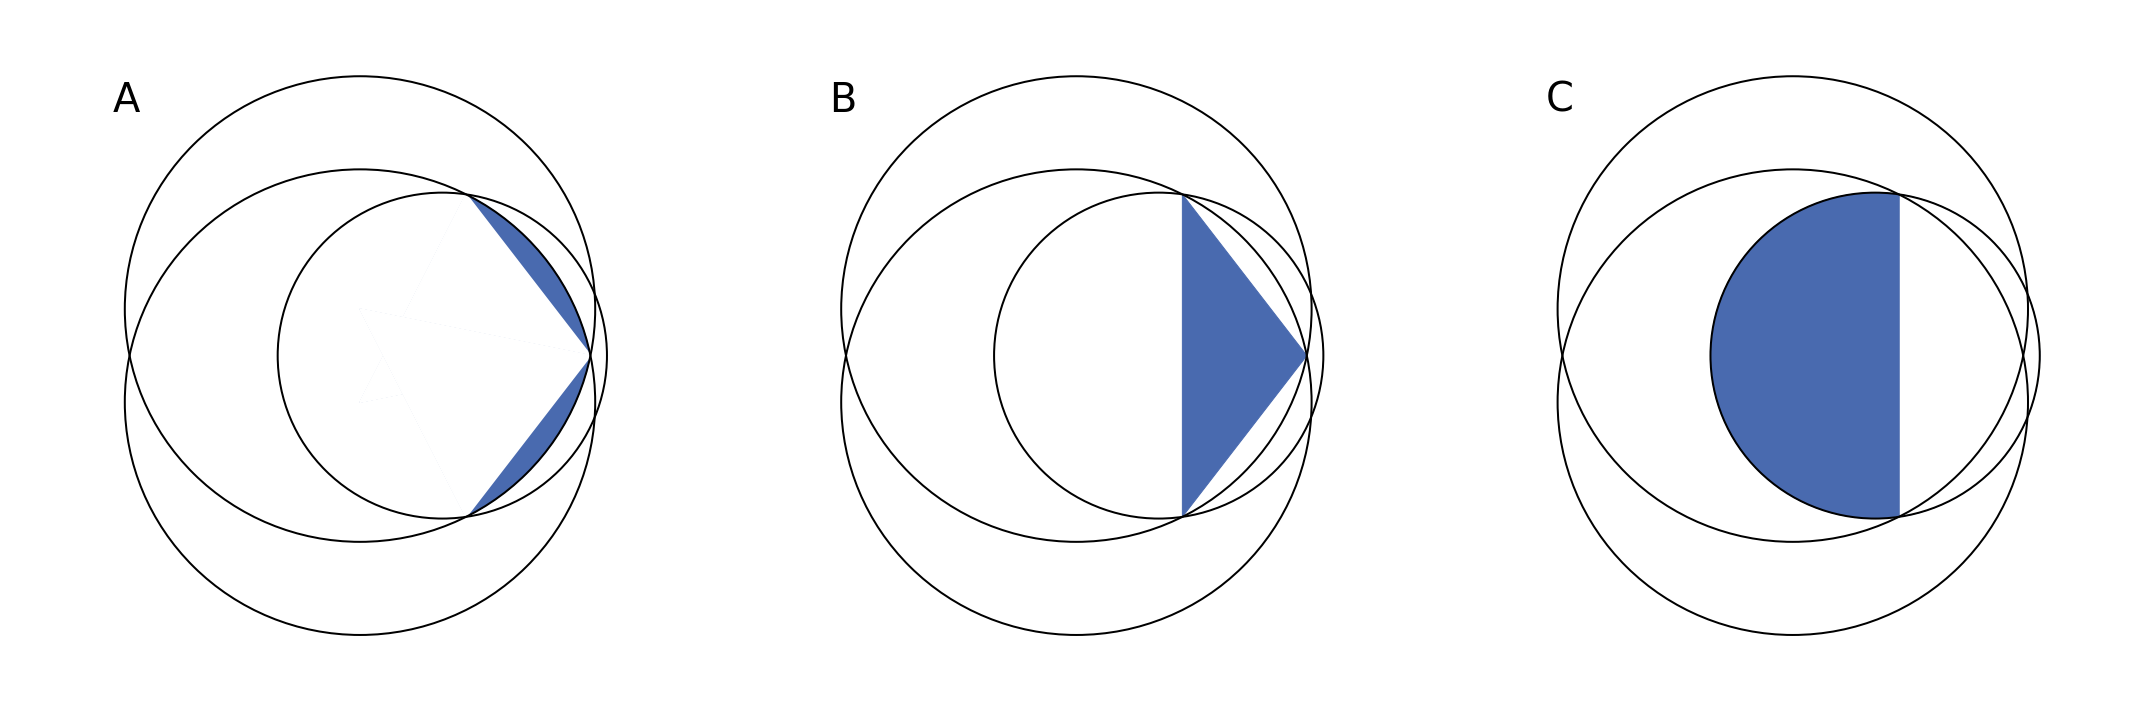

In [920]:
from matplotlib import cm

fig, axs = plt.subplots(1, 3, figsize=(30, 10))

lw = 2
c1 = plt.Circle((x1, y1), r1, fill=False, color='k', linewidth=lw)
c2 = plt.Circle((x2, y2), r2, fill=False, color='k', linewidth=lw)
c3 = plt.Circle((x3, y3), r3, fill=False, color='k', linewidth=lw)


c = cm.Spectral(0.95)

fill_chord(axs[0], (x1, y1), r1, np.pi-np.arccos(c12), np.arccos(c13), color=c)
fill_chord(axs[0], (x2, y2), r2, -np.arccos(c13), np.arccos(c12)-np.pi, color=c)

[axs[0].add_patch(c) for c in (c1, c2, c3)]

pgon = plt.Polygon([[x1 - r1 * c12, y1 + r1 * s12], [x1 + r1 * c13, y1 + r1 * s13], [x1 + r1 * c13, -y1 - r1 * s13]], color=c)
axs[1].add_patch(pgon)

c3 = plt.Circle((x3, y3), r3, fill=True, color=c)
axs[2].add_patch(c3)
fill_chord(axs[2], (x3, y3), r3, np.arccos(c32)-np.pi, np.pi-np.arccos(c32), white=True, color=c)

c1 = plt.Circle((x1, y1), r1, fill=False, color='k', linewidth=lw)
c2 = plt.Circle((x2, y2), r2, fill=False, color='k', linewidth=lw)
c3 = plt.Circle((x3, y3), r3, fill=False, color='k', linewidth=lw)

[axs[1].add_patch(c) for c in (c1, c2, c3)]

c1 = plt.Circle((x1, y1), r1, fill=False, color='k', linewidth=lw)
c2 = plt.Circle((x2, y2), r2, fill=False, color='k', linewidth=lw)
c3 = plt.Circle((x3, y3), r3, fill=False, color='k', linewidth=lw)

[axs[2].add_patch(c) for c in (c1, c2, c3)]

[ax.annotate(l, xy=(0.15, 0.85), xycoords='axes fraction', fontsize=40) for ax, l in zip(axs, ['A', 'B', 'C'])]

#axs[0].annotate(
#    r"$\sum_{i=1}^{2}r_i^2\mathrm{arcsin}\frac{c_i}{2r_i} - \frac{c_i}{4}\sqrt{4r_i^2-c_i^2}$", 
#    xy=(0.25, -0.1), 
#    xycoords='axes fraction', 
#    fontsize=30
#)

#axs[1].annotate(
#    r"$\sqrt{(c_1+c_2+c_3)(c_1+c_2-c_3)(c_1-c_2+c_3)(c_2+c_3-c_1)}$", 
#    xy=(0.05, -0.1), 
#    xycoords='axes fraction', 
#    fontsize=30
#)

#axs[2].annotate(
#    r"$r_3^2\left(\pi-\mathrm{arcsin}\frac{c_3}{2r_3}\right)+\frac{c_3}{4}\sqrt{4r_3^2-c_3^2}$", 
#    xy=(0.22, -0.1), 
#    xycoords='axes fraction', 
#    fontsize=30
#)

#axs[1].annotate('+', xy=(0.01, -0.1), xycoords=('axes fraction'), size=30)
#axs[2].annotate('+', xy=(0.18, -0.1), xycoords=('axes fraction'), size=30)

[ax.set_xlim(-1.5, 1.5) for ax in axs]
[ax.set_ylim(-1.5, 1.5) for ax in axs]
[ax.set_axis_off() for ax in axs]
plt.tight_layout()

plt.savefig('/Users/tgordon/Desktop/fewell_correction.pdf')

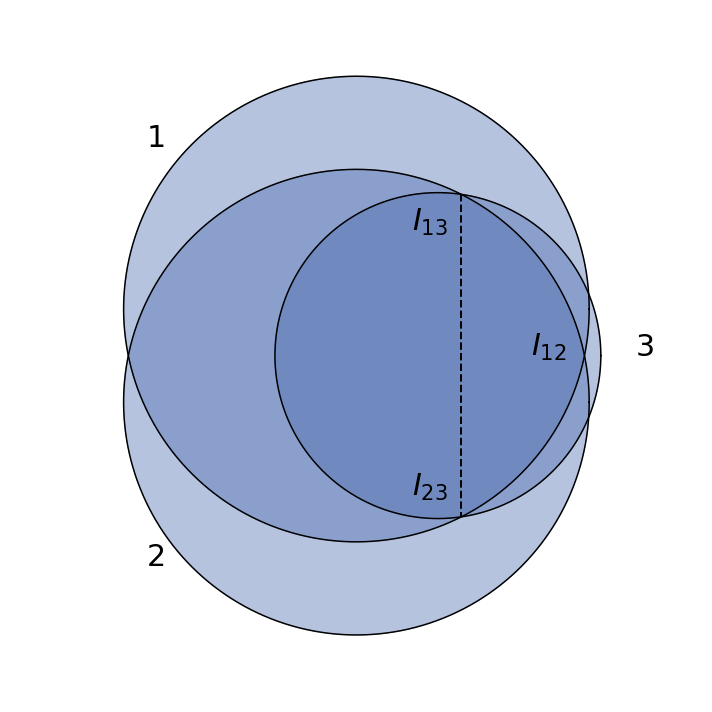

In [957]:
plt.figure(figsize=(10, 10))
c1 = plt.Circle((x1, y1), r1, fill=True, color=c, alpha=0.4)
c2 = plt.Circle((x2, y2), r2, fill=True, color=c, alpha=0.4)
c3 = plt.Circle((x3, y3), r3, fill=True, color=c, alpha=0.4)

t = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x1 + r1 * np.cos(t), y1 + r1 * np.sin(t), 'k')
plt.plot(x2 + r2 * np.cos(t), y2 + r2 * np.sin(t), 'k')
plt.plot(x3 + r3 * np.cos(t), y3 + r3 * np.sin(t), 'k')

[plt.gca().add_patch(c) for c in (c1, c2, c3)]
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.annotate('1', xy=(0.2, 0.8), fontsize=30, xycoords='axes fraction')
plt.annotate('2', xy=(0.2, 0.2), fontsize=30, xycoords='axes fraction')
plt.annotate('3', xy=(0.9, 0.5), fontsize=30, xycoords='axes fraction')

plt.annotate(r'$I_{12}$', xy=(0.75, 0.5), fontsize=30, xycoords='axes fraction')
plt.annotate(r'$I_{13}$', xy=(0.58, 0.68), fontsize=30, xycoords='axes fraction')
plt.annotate(r'$I_{23}$', xy=(0.58, 0.3), fontsize=30, xycoords='axes fraction')

plt.plot([x1 + r1 * c13,x1 + r1 * c13], [y1 + r1 * s13,-y1 - r1 * s13], color='k', linewidth=2, linestyle='--')


plt.gca().set_axis_off()
plt.tight_layout()

plt.savefig('/Users/tgordon/Desktop/fewell_overlap.pdf')